# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [46]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [47]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [48]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
sns.set_theme(style='darkgrid', context='talk')

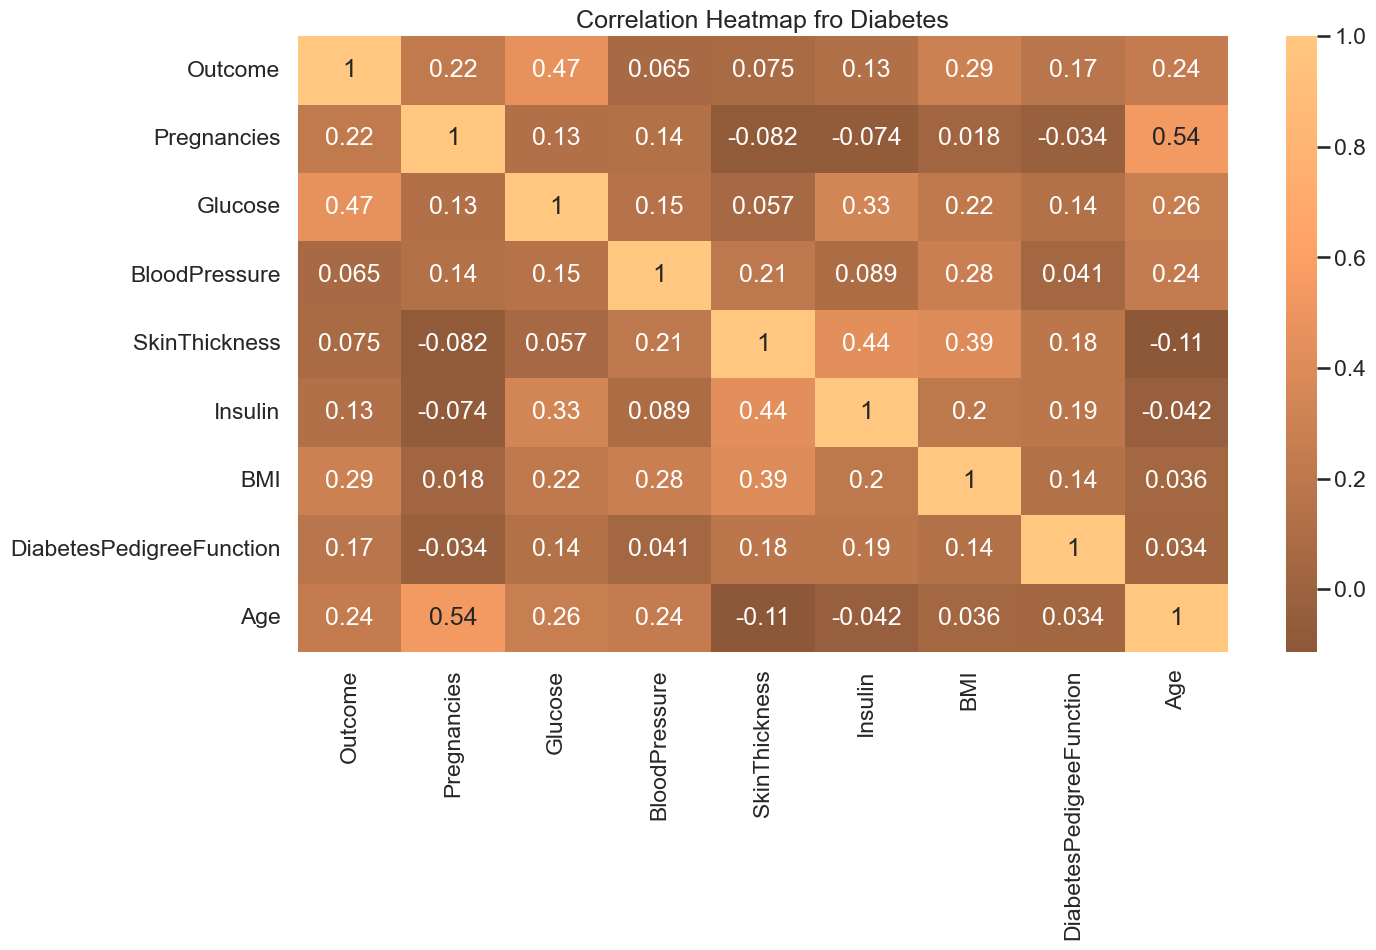

In [50]:

# Select columns for correlation matrix
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Compute correlation matrix
correlation_matrix = diabetes_df[['Outcome'] + selected_columns].corr()

# Plot correlation heatmap using Seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='copper', center=0)
plt.title('Correlation Heatmap fro Diabetes')
plt.show()

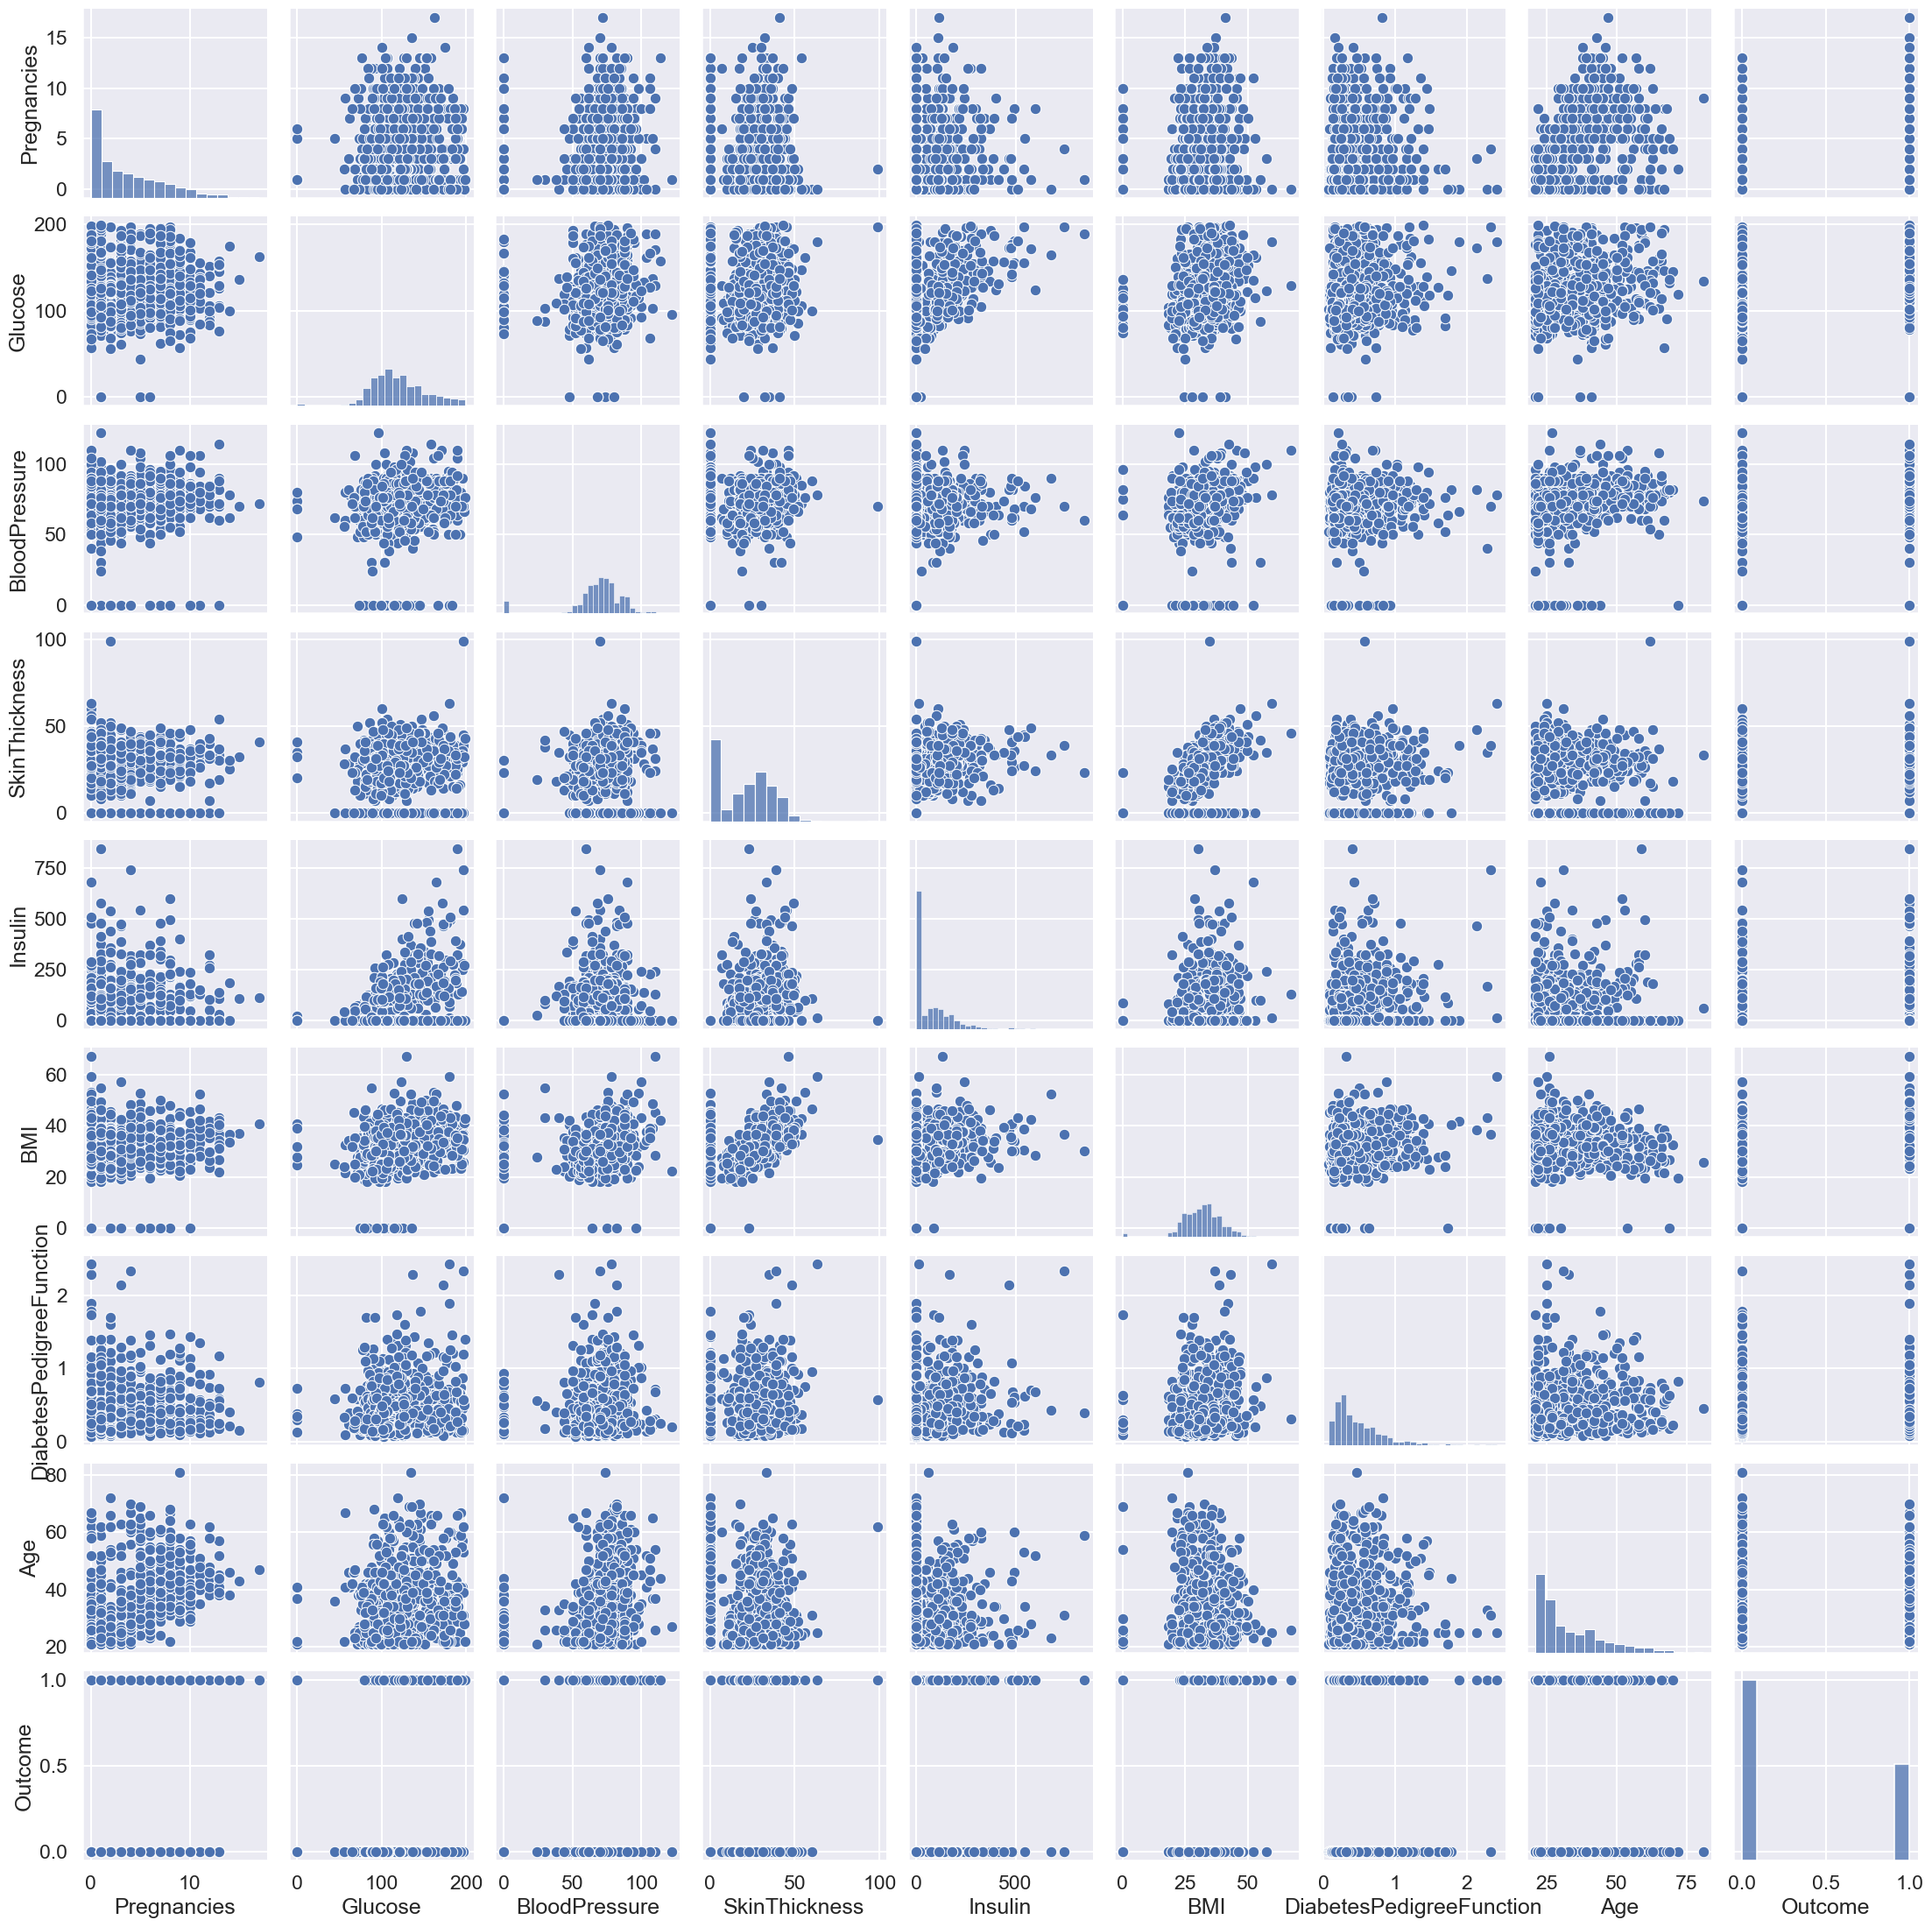

In [51]:
sns.pairplot(diabetes_df)
plt.show()
# diagonal is histogram of the same variable as there is no point in doing a scatter plot fro same variable
# can see ordinal numbers (whole numbers in order... e.g. pregnancies) as lines

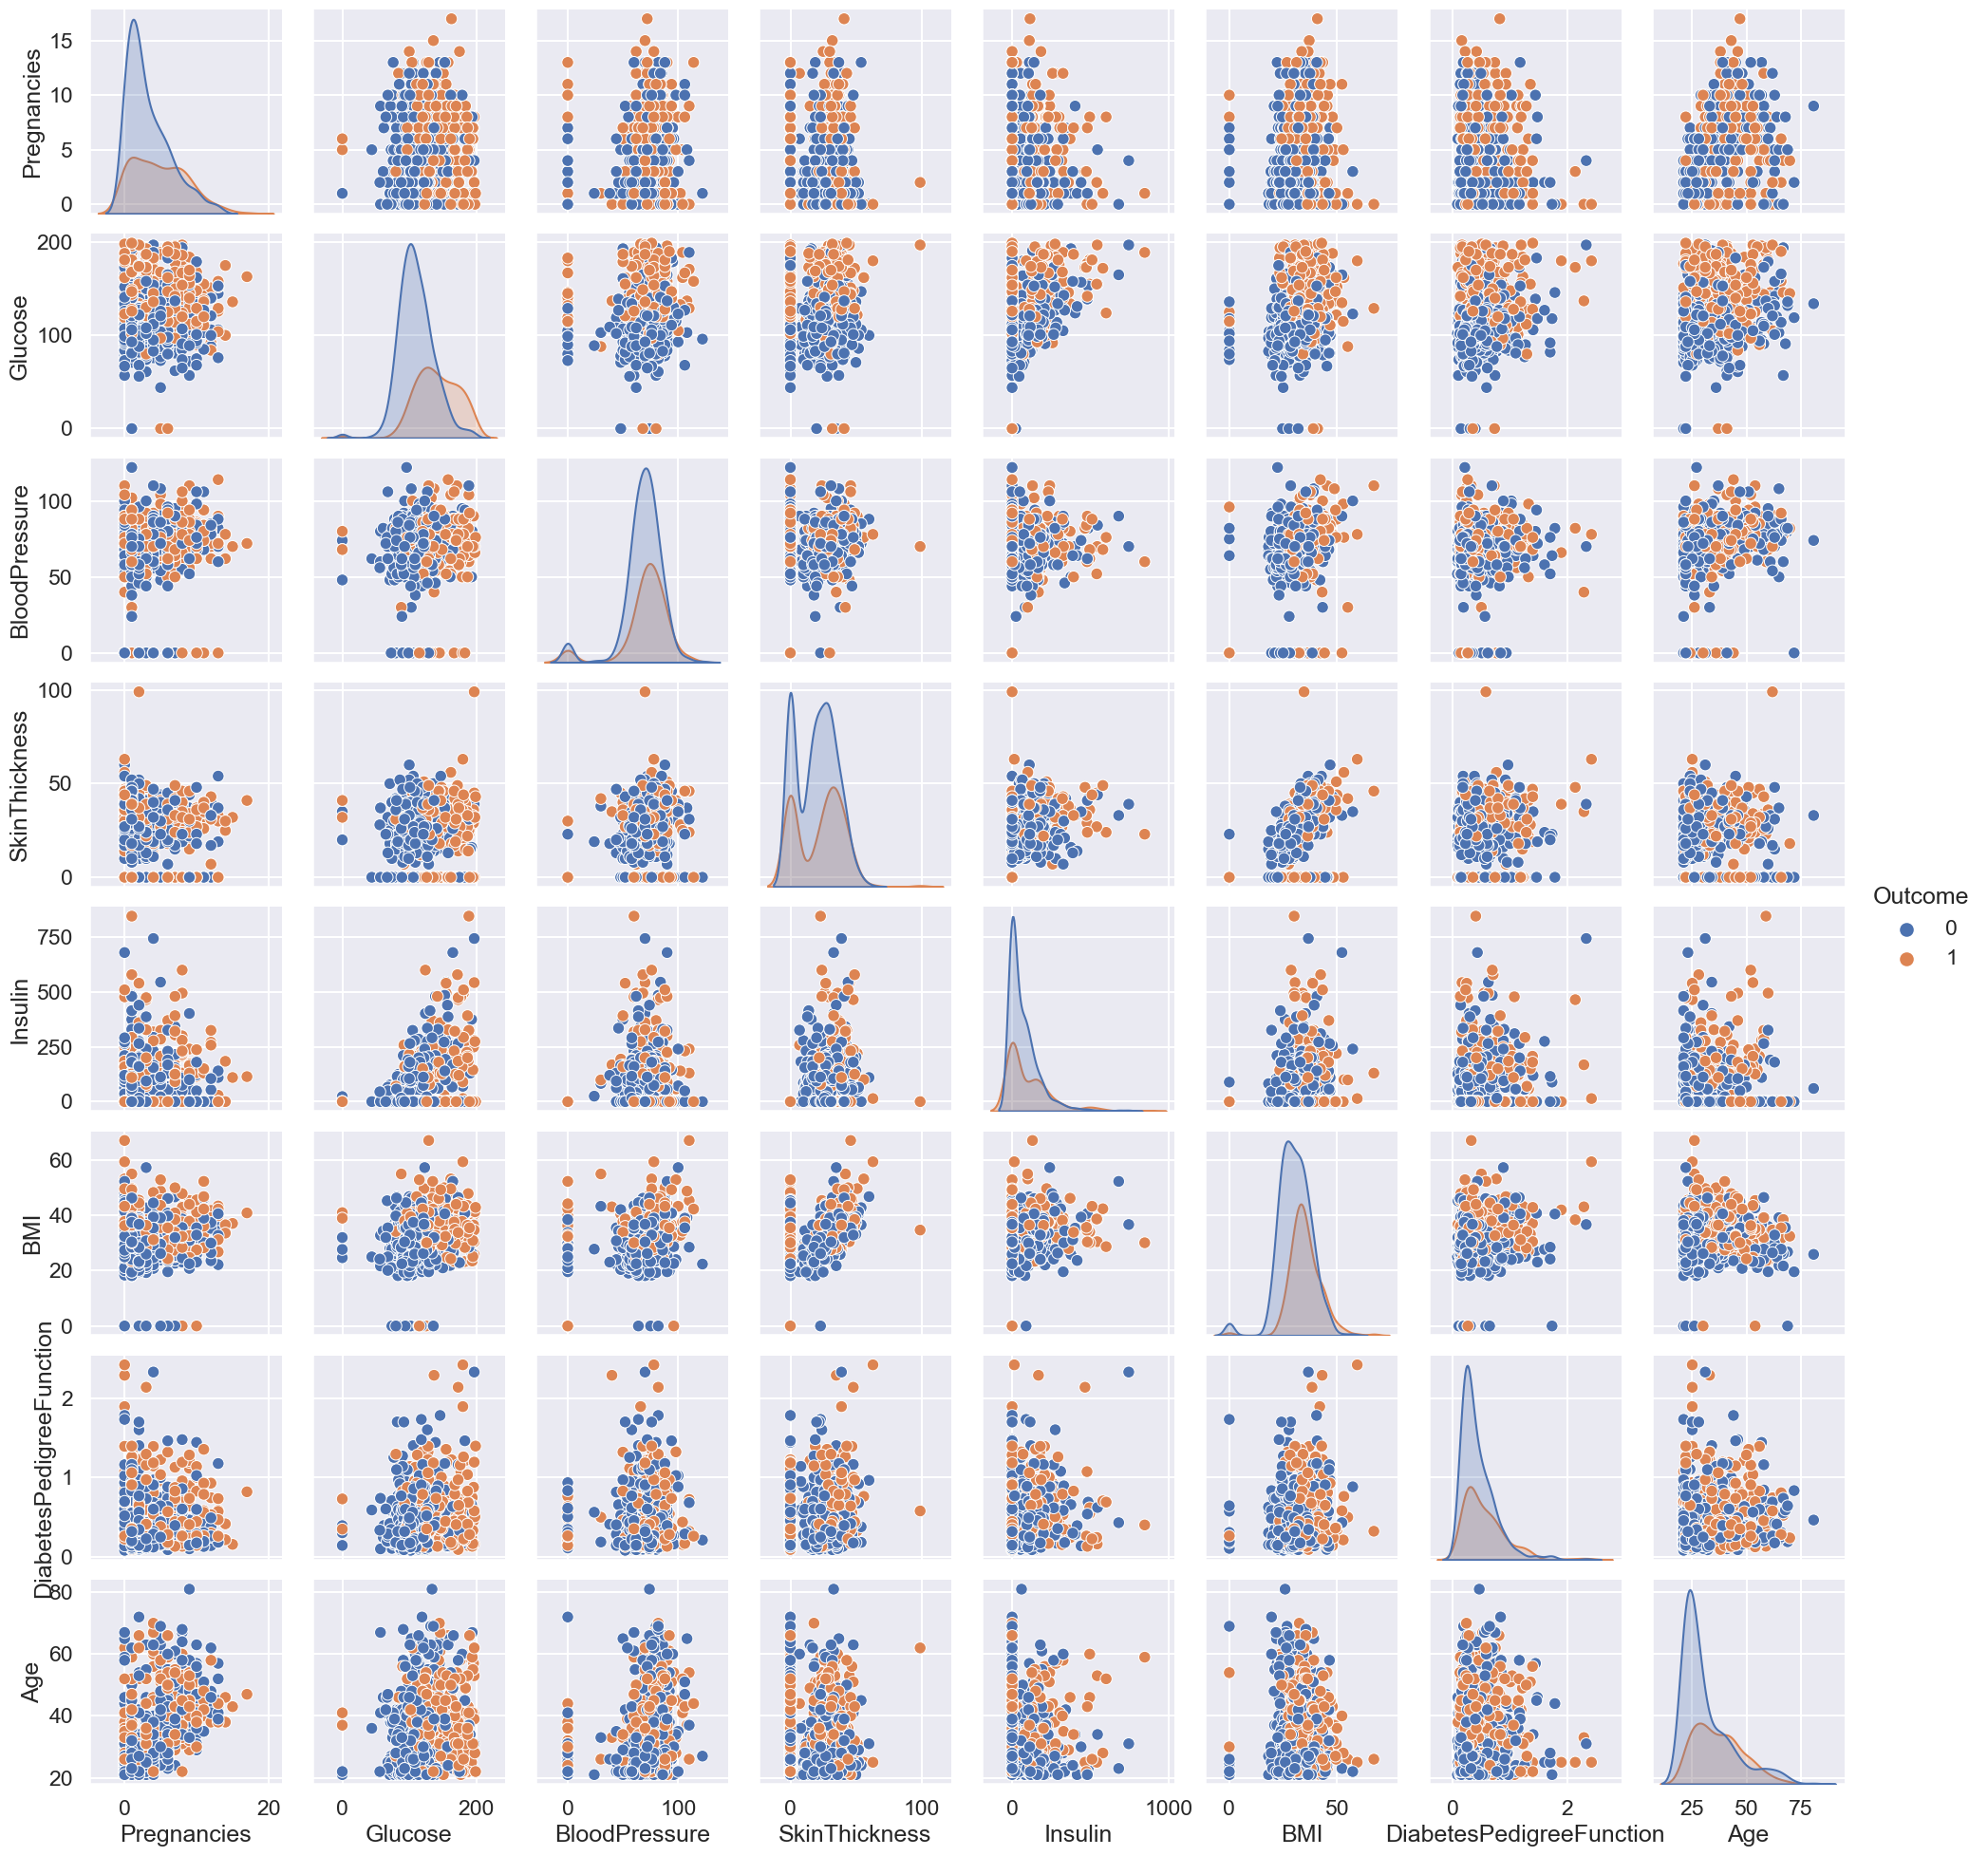

In [52]:
# we could colour the scatter plots based on a feature

sns.pairplot(diabetes_df, hue="Outcome")
plt.show()

# changes the default marginal plot to a kernal density estimate (KDE)

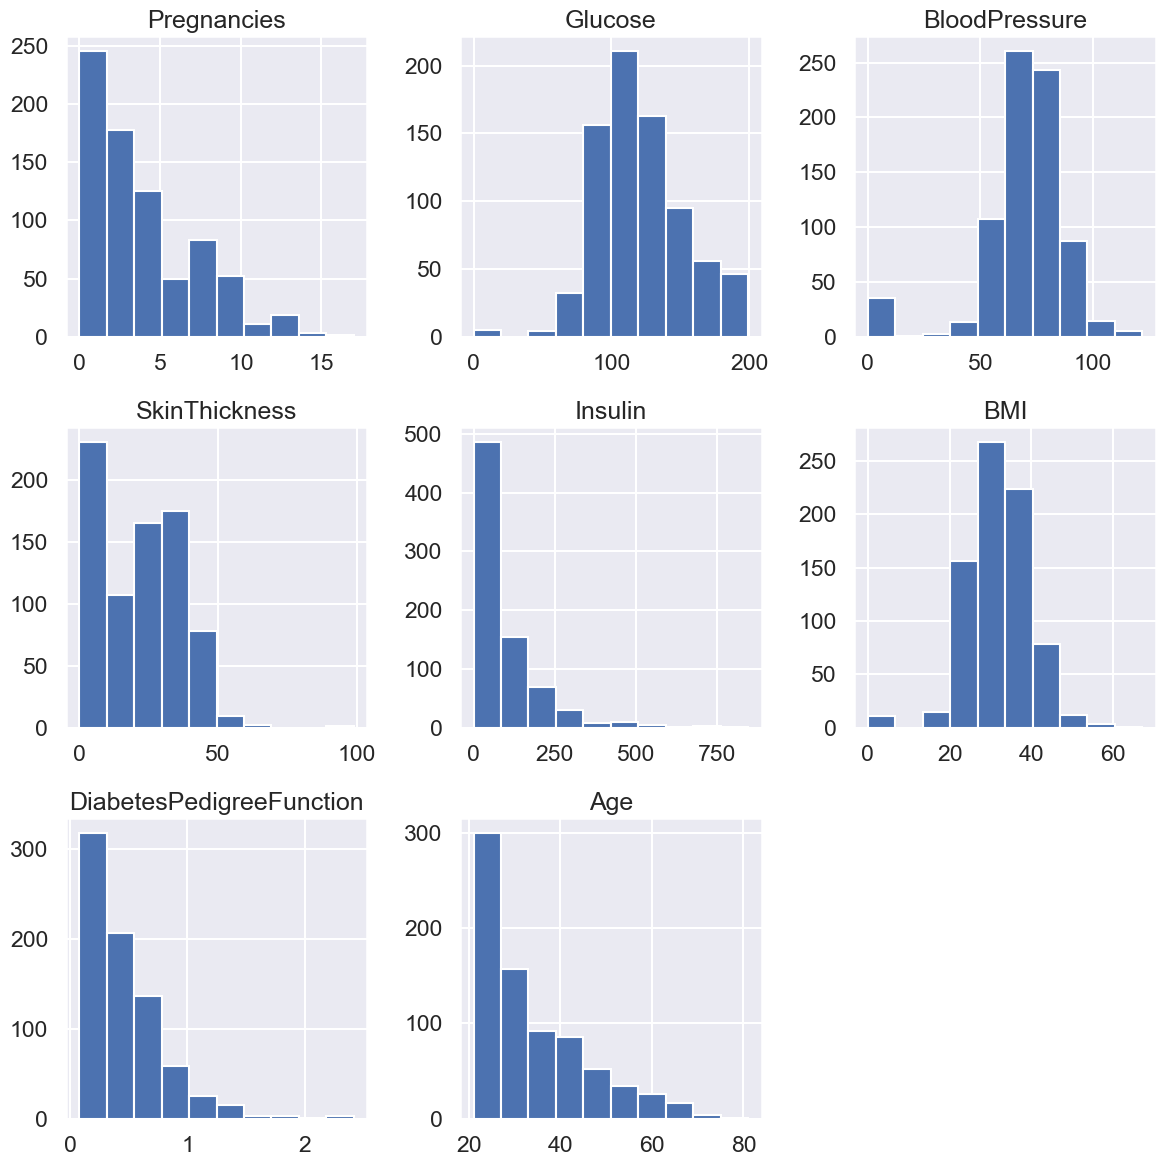

In [53]:
# Exclude 'Outcome' columns
columns_to_exclude = ['Outcome']
columns_to_plot = [col for col in diabetes_df.columns if col not in columns_to_exclude]

plt.rcParams['figure.figsize'] = (12, 12)

diabetes_df[columns_to_plot].hist()

plt.tight_layout()
plt.show()

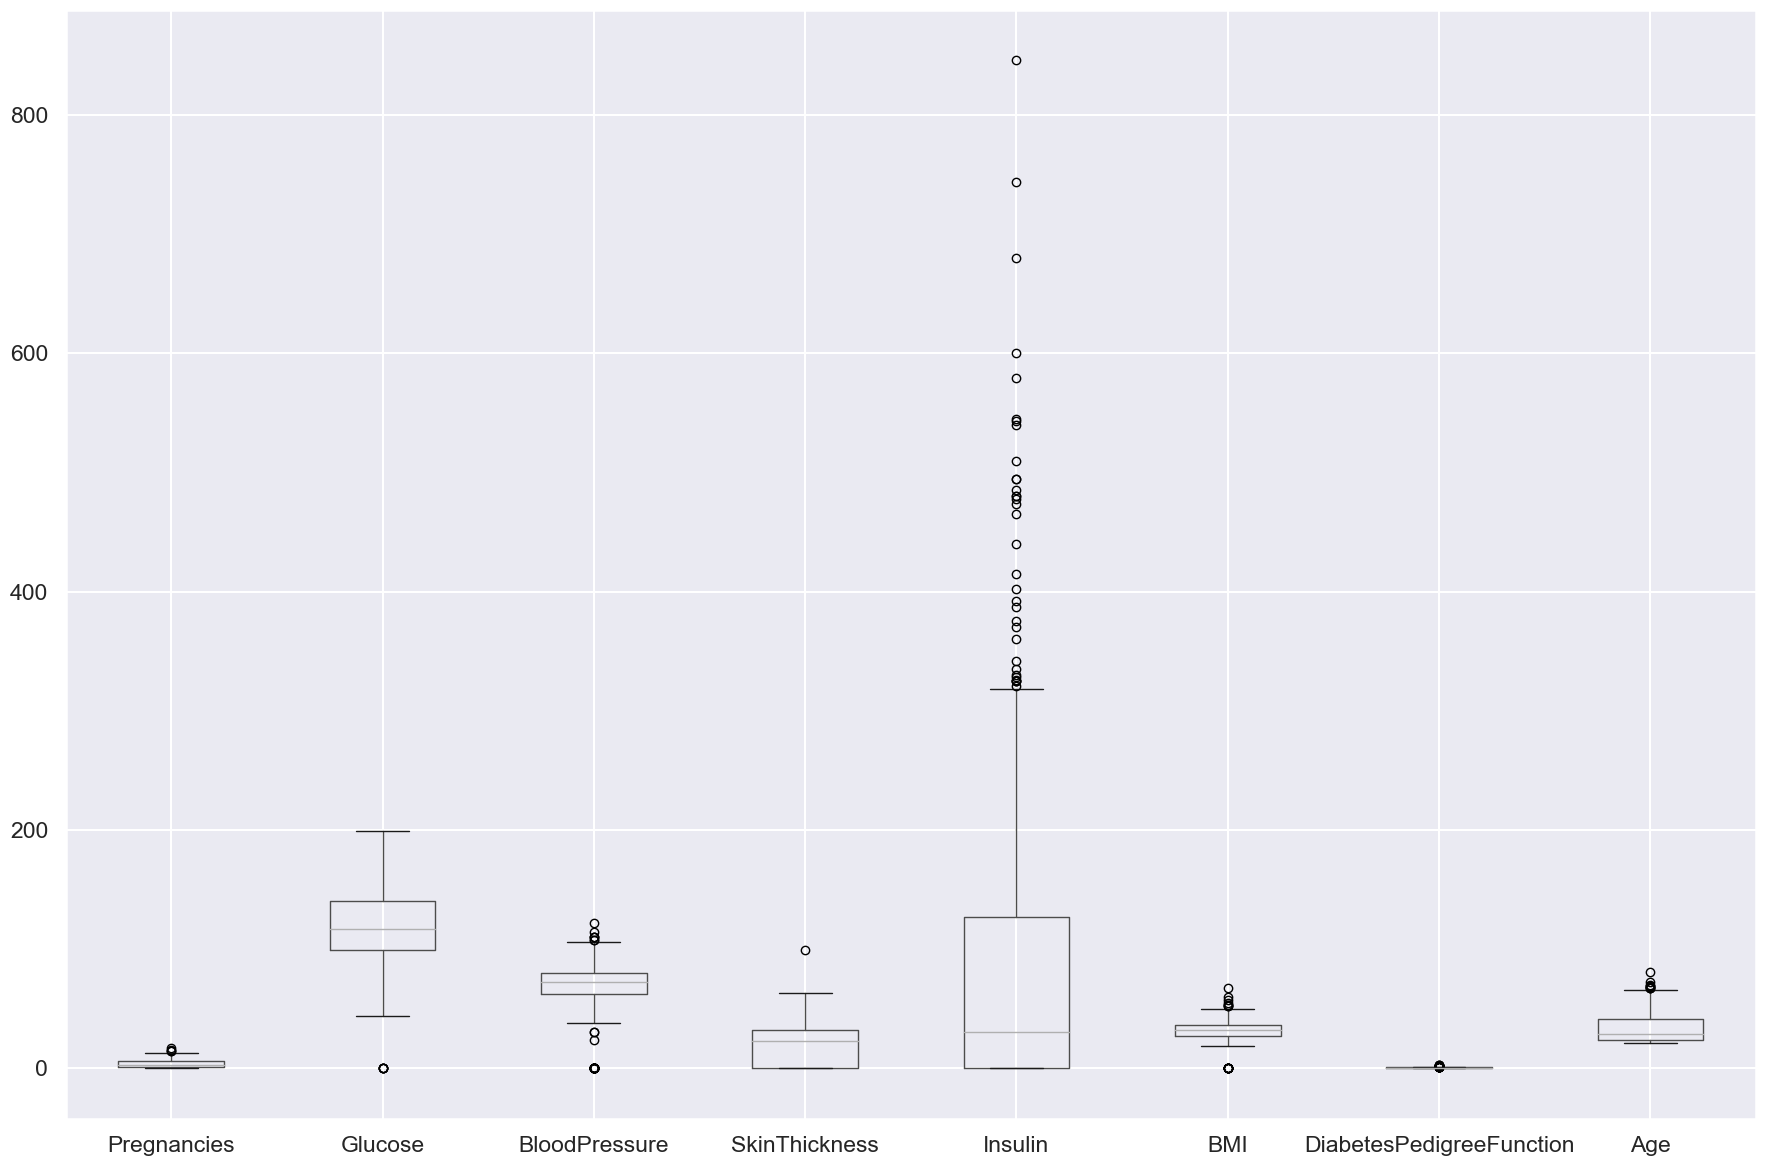

In [54]:
# Exclude 'Outcome' columns
columns_to_exclude = ['Outcome']
columns_to_plot = [col for col in diabetes_df.columns if col not in columns_to_exclude]

plt.rcParams['figure.figsize'] = (18, 12)

diabetes_df[columns_to_plot].boxplot()

plt.tight_layout()
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [55]:
cols_missing_vals = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'] # cols with missing values
(diabetes_df[cols_missing_vals] == 0).sum() # count number of 0s

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [56]:
diabetes_df[cols_missing_vals] = diabetes_df[cols_missing_vals].replace(0, np.NaN) # replace 0's with NaNs
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [57]:
# pd.dropna() has a default parameter, how='any'. Possible input values are 'any', or 'all'

print("Shape before dropping NAs", diabetes_df.shape)

diabetes_df = diabetes_df.dropna(subset=['Glucose', 'BMI']) # drop rows with Glucose and BMI as NaN

print("Shape after dropping NAs for Glucose and BMI columns", diabetes_df.shape)

Shape before dropping NAs (768, 9)
Shape after dropping NAs for Glucose and BMI columns (752, 9)


In [58]:
# Fill in missing values with the average
diabetes_df['SkinThickness'] = diabetes_df['SkinThickness'].fillna(value=diabetes_df['SkinThickness'].mean())
diabetes_df['BloodPressure'] = diabetes_df['BloodPressure'].fillna(value=diabetes_df['BloodPressure'].mean())
diabetes_df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [59]:
# handling outlier, drop it
# Applying the condition
diabetes_df['Insulin'] = diabetes_df['Insulin'].fillna(value=diabetes_df['Insulin'].mean())
diabetes_df.loc[diabetes_df['Insulin']>600, 'Insulin'] = np.NaN

diabetes_df = diabetes_df.dropna()

In [60]:
# Scaling
from sklearn.preprocessing import StandardScaler

columns_to_exclude = ['Outcome']
columns_features =  [col for col in diabetes_df.columns if col not in columns_to_exclude]
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(diabetes_df[columns_features]))

In [61]:
df_scaled

0         1         2         3         4         5         6  \
0    0.634103  0.865924 -0.032694  0.659430  0.031310  0.170251  0.483057   
1   -0.847317 -1.207890 -0.527037 -0.018333  0.031310 -0.844560 -0.370130   
2    1.226672  2.018043 -0.691818  0.001129  0.031310 -1.322971  0.622164   
3   -0.847317 -1.076219 -0.527037 -0.696096 -0.776357 -0.627101 -0.938921   
4   -1.143601  0.503830 -2.669191  0.659430  0.186760  1.547496  5.617635   
..        ...       ...       ...       ...       ...       ...       ...   
744  1.819240 -0.681207  0.296868  2.127916  0.342942  0.068770 -0.926556   
745 -0.551033  0.010064 -0.197475 -0.244254  0.031310  0.634165 -0.404133   
746  0.337819 -0.022853 -0.032694 -0.696096 -0.542085 -0.902549 -0.697803   
747 -0.847317  0.141735 -1.021380  0.001129  0.031310 -0.337154 -0.376312   
748 -0.847317 -0.944549 -0.197475  0.207588  0.031310 -0.293662 -0.481415   

            7  
0    1.430096  
1   -0.196478  
2   -0.110869  
3   -1.052570  
4   -0.025260  
..        ...  
744  2.543014  
745 -0.538915  
746 -0.282087  
747  1.173268  
748 -0.881351  

[749 rows x 8 columns]

In [62]:
df_scaled.columns = columns_features
df_scaled

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.634103  0.865924      -0.032694       0.659430  0.031310  0.170251   
1      -0.847317 -1.207890      -0.527037      -0.018333  0.031310 -0.844560   
2       1.226672  2.018043      -0.691818       0.001129  0.031310 -1.322971   
3      -0.847317 -1.076219      -0.527037      -0.696096 -0.776357 -0.627101   
4      -1.143601  0.503830      -2.669191       0.659430  0.186760  1.547496   
..           ...       ...            ...            ...       ...       ...   
744     1.819240 -0.681207       0.296868       2.127916  0.342942  0.068770   
745    -0.551033  0.010064      -0.197475      -0.244254  0.031310  0.634165   
746     0.337819 -0.022853      -0.032694      -0.696096 -0.542085 -0.902549   
747    -0.847317  0.141735      -1.021380       0.001129  0.031310 -0.337154   
748    -0.847317 -0.944549      -0.197475       0.207588  0.031310 -0.293662   

     DiabetesPedigreeFunction       Age  
0                    0.483057  1.430096  
1                   -0.370130 -0.196478  
2                    0.622164 -0.110869  
3                   -0.938921 -1.052570  
4                    5.617635 -0.025260  
..                        ...       ...  
744                 -0.926556  2.543014  
745                 -0.404133 -0.538915  
746                 -0.697803 -0.282087  
747                 -0.376312  1.173268  
748                 -0.481415 -0.881351  

[749 rows x 8 columns]

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

## Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_scaled
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

acc_train = log_reg.score(X_train,y_train)
print(f'acc train: {acc_train}')

acc_test = log_reg.score(X_test,y_test)
print(f'acc test: {acc_test}')

acc train: 0.7646076794657763
acc test: 0.8133333333333334


In [64]:
# Get a classification report with multiple statistics
from sklearn.metrics import classification_report
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.72      0.62      0.67        45

    accuracy                           0.81       150
   macro avg       0.78      0.76      0.77       150
weighted avg       0.81      0.81      0.81       150



In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

0.8609523809523809

## Decision Tree

In [68]:
from sklearn.model_selection import train_test_split

# X = diabetes_df[columns_features]
X = df_scaled
y = diabetes_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [69]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree DecisionTreeClassifier for Classification, evaluation: acc, etc

dt = DecisionTreeClassifier(max_depth=10) # Make depth 10
dt.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=10)

In [70]:
# Get a classification report with multiple statistics
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.53      0.62      0.57        45

    accuracy                           0.72       150
   macro avg       0.68      0.69      0.68       150
weighted avg       0.74      0.72      0.73       150



In [71]:
acc_train = dt.score(X_train,y_train)
print(f'acc train: {acc_train}')

acc_test = dt.score(X_test,y_test)
print(f'acc test: {acc_test}')

acc train: 0.9716193656093489
acc test: 0.72


In [72]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

0.6940740740740741

## Random Forest

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
#Plots training error and testing error, using various amounts of trees in the random forest.
def make_num_tree_plot(X_train, y_train, X_test, y_test, num_trees):
    """
    Make number of trees vs error rate plot for RandomForestClassifier

    Parameters
    ----------
    X_train: numpy.ndarray
        The X part of the train set
    y_train: numpy.ndarray
        The y part of the train set
    X_test: numpy.ndarray
        The X part of the test/validation set
    y_test: numpy.ndarray
        The y part of the test/validation set
    num_trees: int
        The value for `n_estimators` argument of RandomForestClassifier
    Returns
    -------
        None
        Shows the number of trees vs error rate plot

    """
    train_err = []
    test_err = []
    for ntree in num_trees:
        model = RandomForestClassifier(n_estimators=ntree)
        model.fit(X_train, y_train)
        train_err.append(1-model.score(X_train, y_train))
        test_err.append(1-model.score(X_test, y_test))

    fig, ax = plt.subplots()
    ax.plot(num_trees,train_err,label="train")
    ax.plot(num_trees,test_err,label="test")
    ax.set_xlabel('number of trees');
    ax.set_ylabel('error rate');
    ax.set_xscale('log')
    ax.legend()
    plt.show()

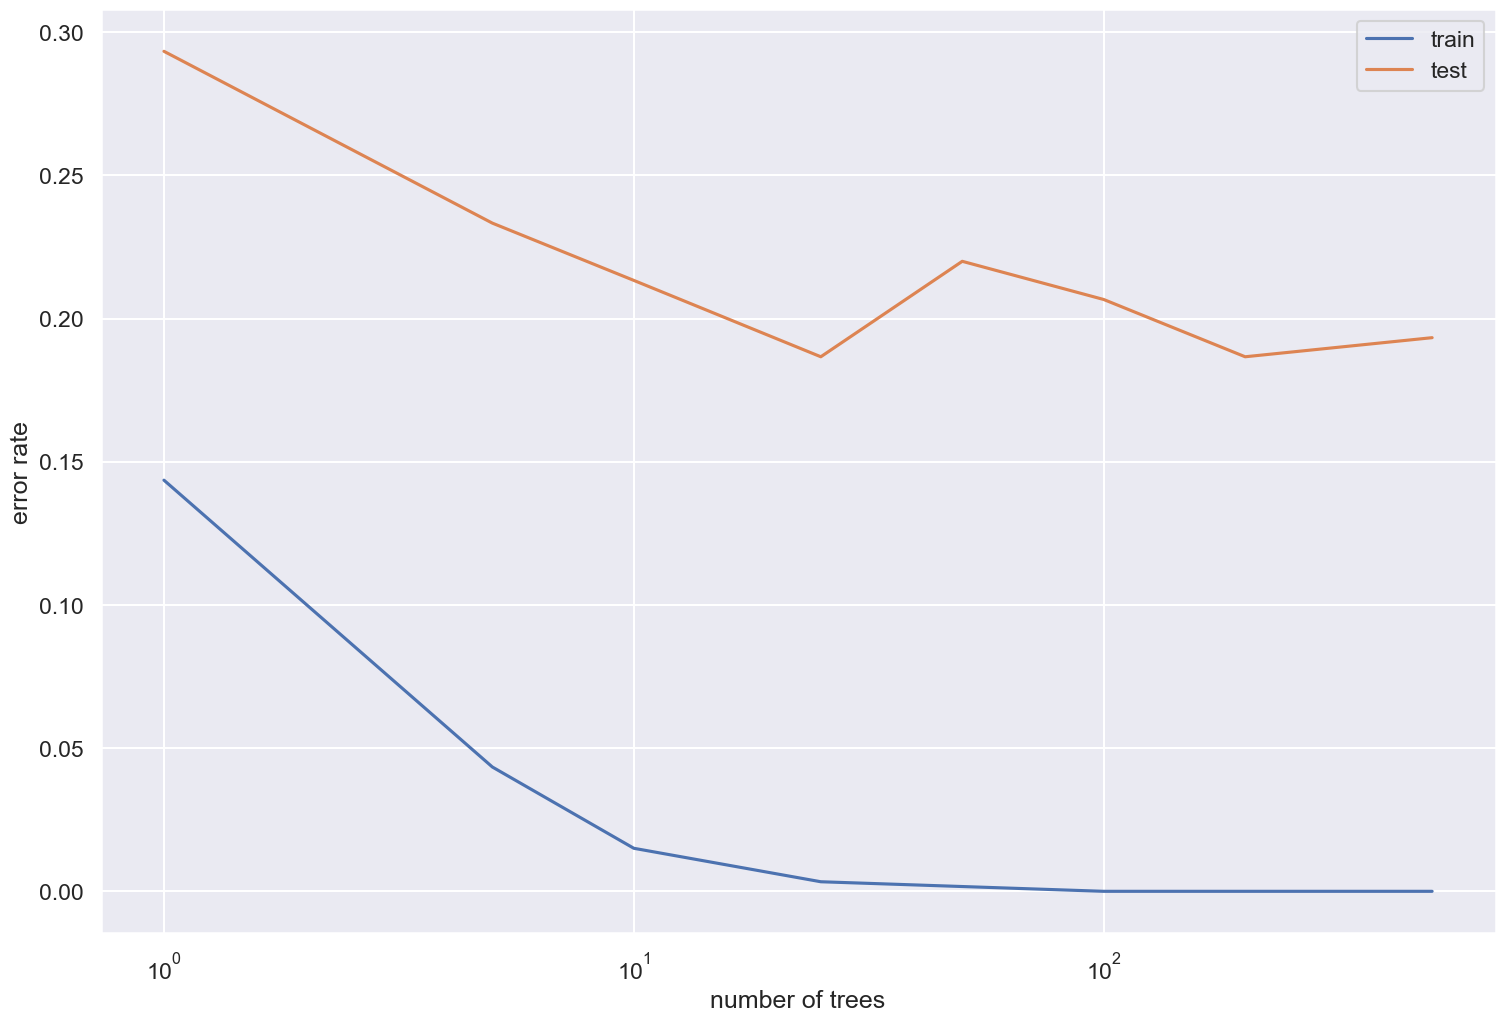

In [81]:
#fit a random forest for various n_estimators and plot the error
make_num_tree_plot(X_train, y_train, X_test, y_test, (1,5,10,25,50,100,200,500))

In [82]:
# choose the tree number = 100
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
       

RandomForestClassifier()

In [83]:
# Get a classification report with multiple statistics
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.68      0.67      0.67        45

    accuracy                           0.81       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.81      0.81      0.81       150



In [84]:
acc_train = model.score(X_train,y_train)
print(f'acc train: {acc_train}')

acc_test = model.score(X_test,y_test)
print(f'acc test: {acc_test}')

acc train: 1.0
acc test: 0.8066666666666666


In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.8685714285714285

# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

###  'SkinThickness', 'Insulin' column around 1/3 values are missing, and 'Insulin' has many outliers
###  'SkinThickness','BloodPressure' has a lowest correlation with 'Outcome', which is 0.075, 0.065 respectively
###  After Scaling the features, the model performance improved
###  Random forest Model performance is better than Decision Tree Model